# Lead Score - Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
<br>
## Goals and Objectives
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [48]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Loading and Cleaning Data

##  1.1  Importing Data 

In [49]:
# Loading the data set using pandas library
df_lead = pd.read_csv('Leads.csv')

# taking a look at top 5 rows
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspecting the dataset for better understanding

In [50]:
# using the info() method on data set
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [51]:
# Using shape attribute  get the no. of rows and columns
df_lead.shape

(9240, 37)

In [52]:
#Using describe method to better understand neumeric fatures
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [53]:
# Converting all the values to lower case if values are string object
df_lead = df_lead.applymap(lambda x:x.lower() if type(x) == str else x)
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [54]:
# Checking if there are columns with one unique values
df_lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [55]:
# Replacing 'Select' with NaN value Since it means no option is selected for this fature
df_lead = df_lead.replace('select',np.nan)

In [56]:
df_lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.00,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.50,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.00,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,...,no,potential lead,mumbai,02.medium,01.high,15.0,17.0,no,no,email marked spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,...,no,potential lead,mumbai,02.medium,01.high,14.0,19.0,no,yes,sms sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,...,no,potential lead,mumbai,02.medium,01.high,13.0,20.0,no,yes,sms sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,landing page submission,google,no,no,1,3.0,499,3.00,...,no,NaN,other metro cities,02.medium,02.medium,15.0,16.0,no,no,sms sent


In [57]:
# Dropping unique valued columns
df1_lead= df_lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [58]:
# Checking if there are columns with one unique values
df1_lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [59]:
# Checking the percentage of missing values in df1_lead data frame
round(100*(df1_lead.isnull().sum()/len(df1_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [60]:
# Removing all the columns that are no required and have 35% null values
df1_lead.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis='columns', 
              inplace=True)
df1_lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [61]:
# Rechecking the percentage of missing values
round(100*(df1_lead.isnull().sum()/len(df1_lead.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Still there are lot of null values in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and since they are important columns instead replacing the NaN values with 'not provided'. In case if these come up in the model, it will be of no use and we will drop it off.

In [62]:
# replacing null values with 'not provided'
df1_lead['What matters most to you in choosing a course'] = df1_lead['What matters most to you in choosing a course'].fillna('not provided')
df1_lead['What is your current occupation'] = df1_lead['What is your current occupation'].fillna('not provided')
df1_lead['Country'] = df1_lead['Country'].fillna('not provided')
df1_lead['Specialization'] = df1_lead['Specialization'].fillna('not provided')

#checking for null vlaues
df1_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [63]:
# Rechecking the percentage of missing values
round(100*(df1_lead.isnull().sum()/len(df1_lead.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [64]:
# using value_Counts() on country categorical varibale
df1_lead["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [65]:
# repalcing all the other country names with 'outside india' using user defined function

def cntry(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df1_lead['Country'] = df1_lead.apply(lambda x:cntry(x['Country']), axis = 1)


In [66]:
# checking the country column
df1_lead['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [67]:
# Rechecking the percentage of missing values
round(100*(df1_lead.isnull().sum()/len(df1_lead.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [68]:
# removing the rows with null values since there are very few rows with null values and negligible impact on analysis
df2_lead = df1_lead[df1_lead.isnull().sum(axis=1) <1]

In [69]:
# Rechecking the percentage of missing values
round(100*(df2_lead.isnull().sum()/len(df2_lead.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [70]:
# Removing Id values since they are unique for everyone
df_final = df2_lead.drop('Prospect ID',1)
df_final.shape

(9074, 21)

## 2. EDA

### 2.1. Univariate Analysis

In [71]:
# checking the final data frame
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

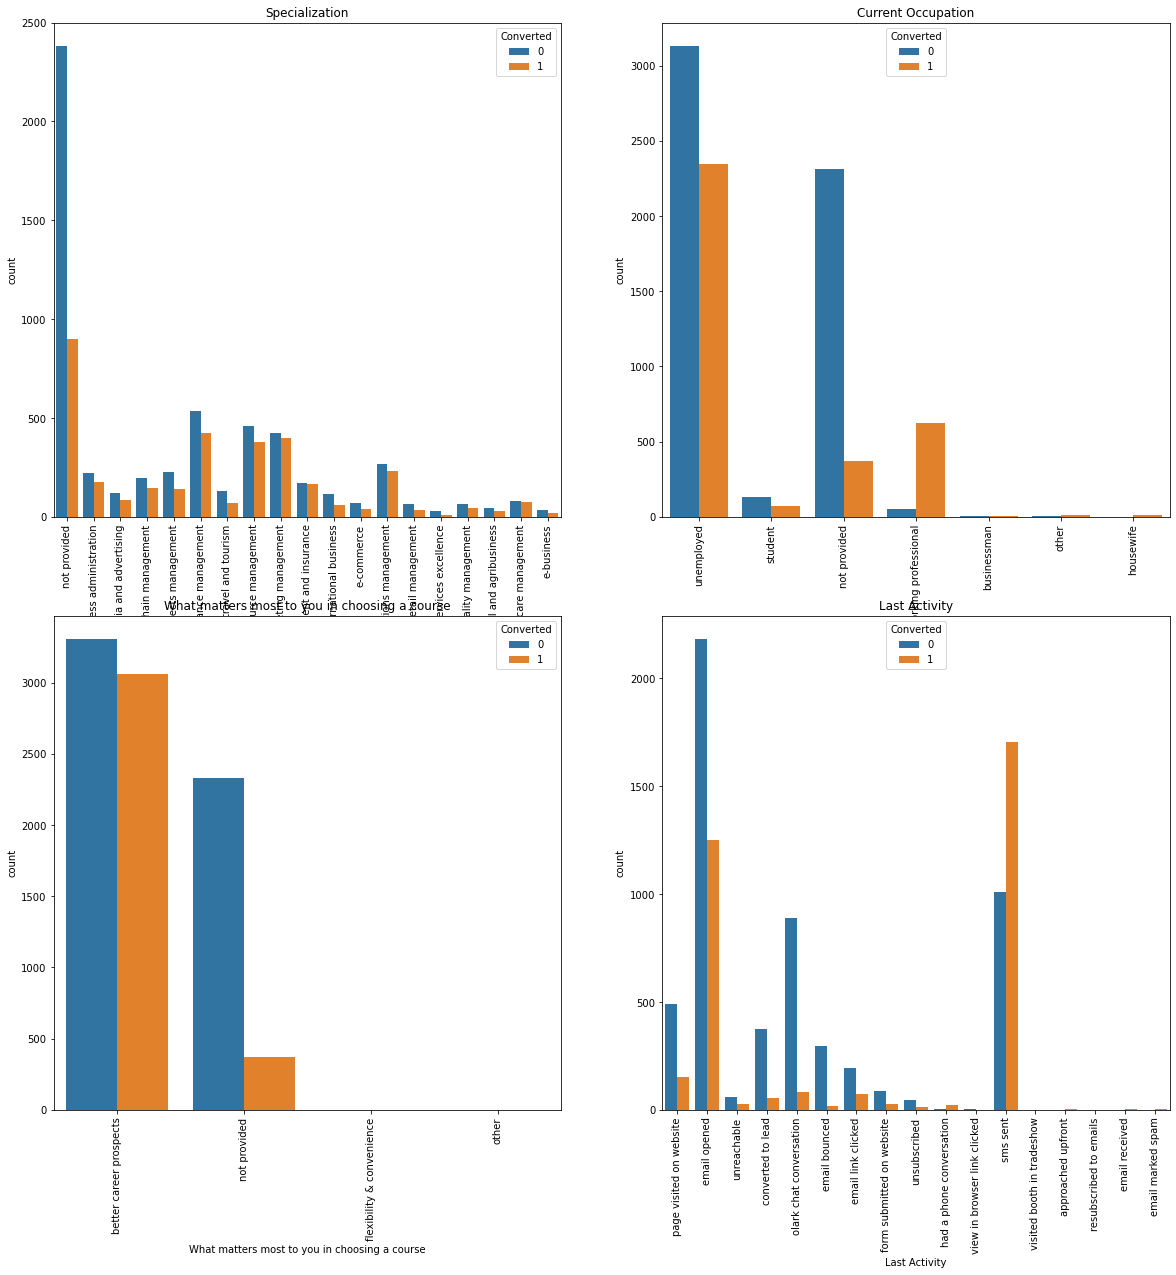

In [158]:
# plotting countplots for categorical variable using subplots and using hue on target variable to better understanding

plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(df_final['Specialization'],hue=df_final['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_final['What is your current occupation'], hue=df_final['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_final['What matters most to you in choosing a course'], hue=df_final['Converted']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_final['Last Activity'], hue=df_final['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

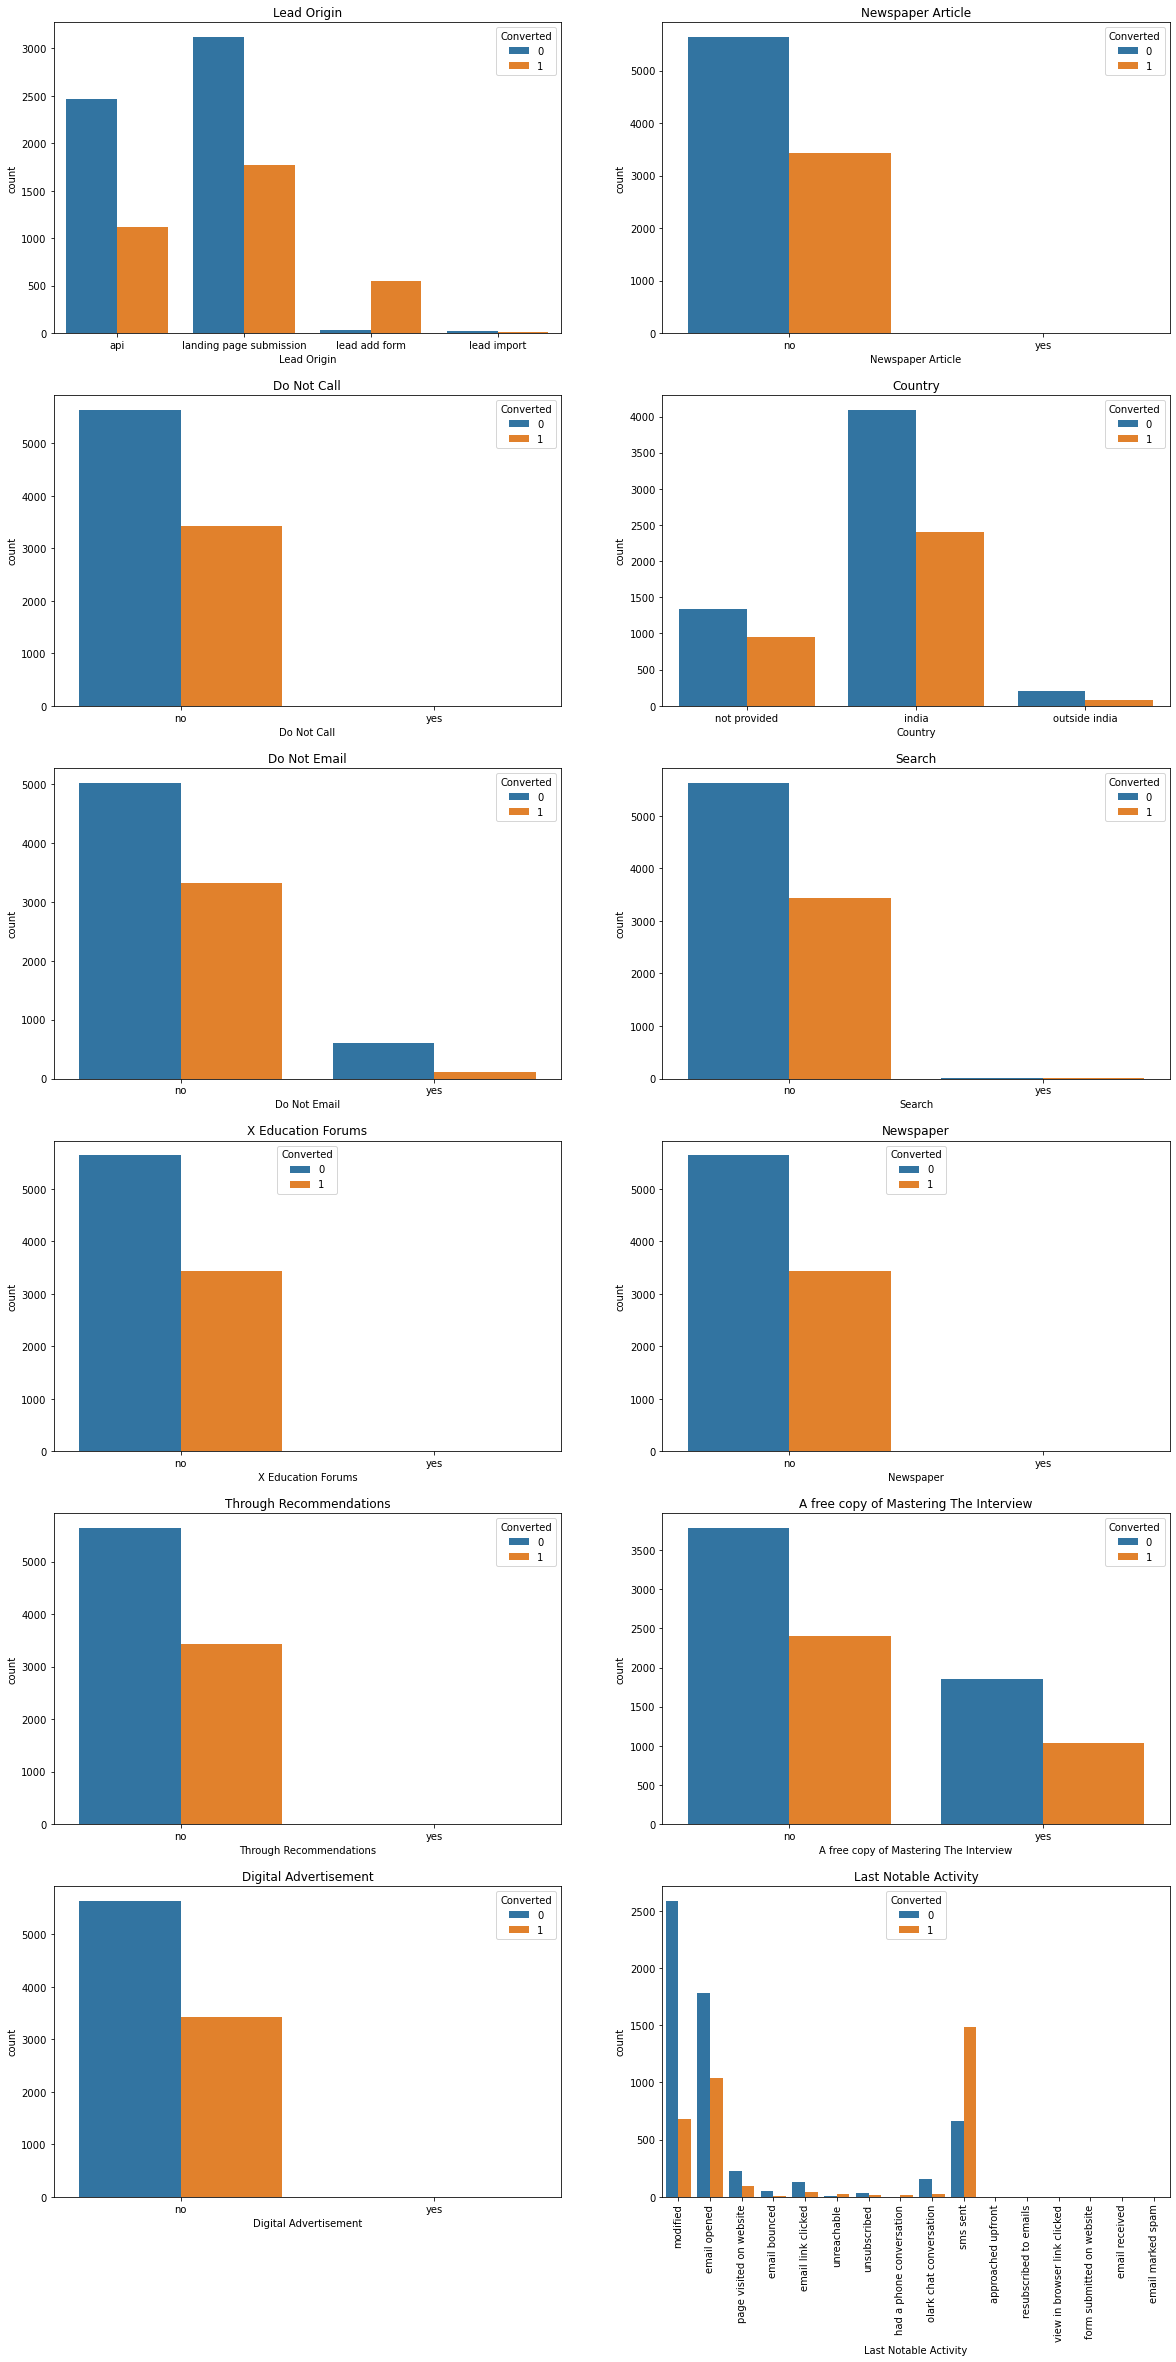

In [73]:
# plotting countplots for categorical variable using subplots
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_final['Lead Origin'], hue=df_final['Converted'])
plt.title('Lead Origin')


plt.subplot(6,2,2)
sns.countplot(df_final['Newspaper Article'], hue=df_final['Converted'])
plt.title('Newspaper Article')

plt.subplot(6,2,3)
sns.countplot(df_final['Do Not Call'], hue=df_final['Converted'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_final['Country'], hue=df_final['Converted'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['Do Not Email'], hue=df_final['Converted'])
plt.title('Do Not Email')

plt.subplot(6,2,6)
sns.countplot(df_final['Search'], hue=df_final['Converted'])
plt.title('Search')


plt.subplot(6,2,7)
sns.countplot(df_final['X Education Forums'], hue=df_final['Converted'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['Newspaper'], hue=df_final['Converted'])
plt.title('Newspaper')



plt.subplot(6,2,9)
sns.countplot(df_final['Through Recommendations'], hue=df_final['Converted'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(df_final['A free copy of Mastering The Interview'], hue=df_final['Converted'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(df_final['Digital Advertisement'], hue=df_final['Converted'])
plt.title('Digital Advertisement')

plt.subplot(6,2,12)
sns.countplot(df_final['Last Notable Activity'], hue=df_final['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

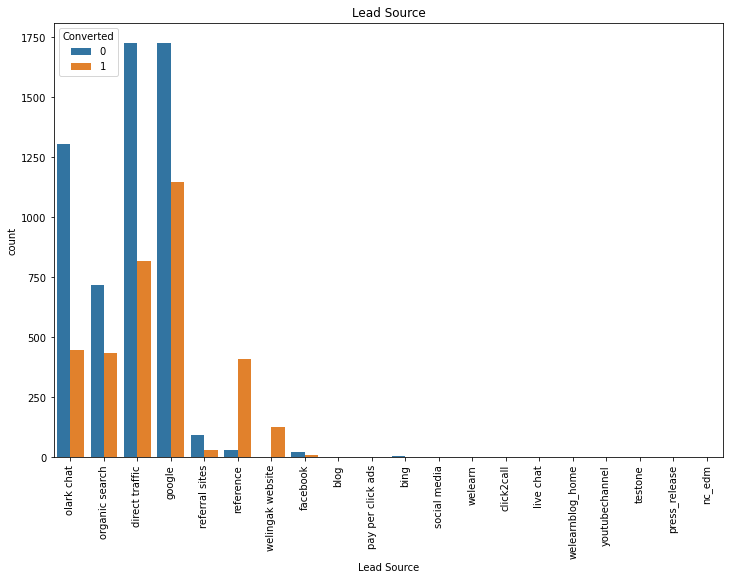

In [74]:
#plotting countplot for 'Lead Source' with hue as target variable
plt.figure(figsize = (12,8))
sns.countplot(df_final['Lead Source'],hue=df_final['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

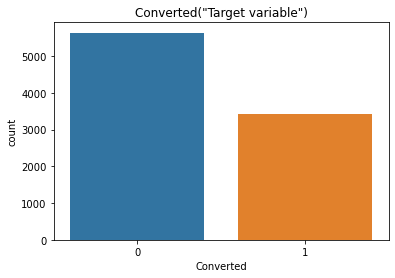

In [75]:
#plotting countplot for targer variable
sns.countplot(df_final['Converted'])
plt.title('Converted("Target variable")')
plt.show()

####  Analysis of Numerical Variables

In [76]:
# using describe method on df_final
df_final.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


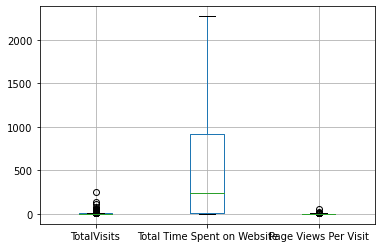

In [77]:
#plotting boxplot for numerical variables for understanding outlier values

df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].boxplot()
plt.show()

In [78]:
#taking percentiles on numeric columns to understand outliers
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


so, we can see there aren't any major oulier data in the numerical columns

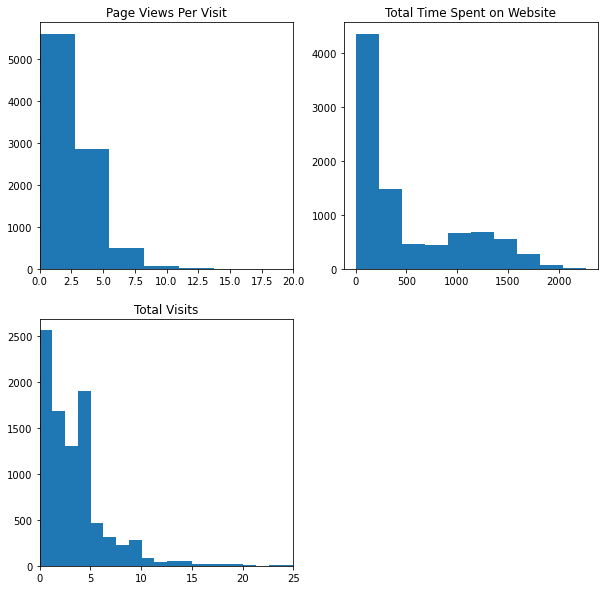

In [79]:
# plotting histograms using subplots

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.show()

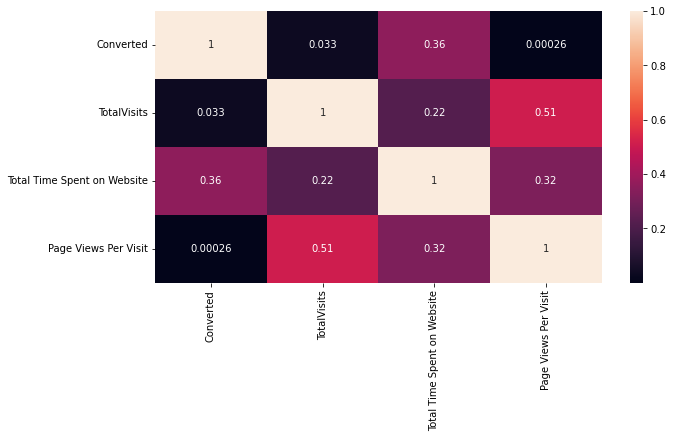

In [80]:
# checking the correlation among varibles using heat maps
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr(), annot=True)
plt.show()

## 3. Creating and handling dummy Variables

In [81]:
#checking all features which are of object type
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [82]:
# Creating dummy variables using the 'get_dummies' method
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
                                 'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding  results to the original dataset
df_final_lead= pd.concat([df_final, dummy], axis=1)
df_final_lead

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [83]:
# dropping the columns after creating dummy for these columns
df_final_lead = df_final_lead.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 
                                    'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 
                                    'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 
                                    'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_lead

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Scaling and splitting dataset into Test &Train data

In [84]:
# Import the required library
from sklearn.model_selection import train_test_split

In [85]:
X = df_final_lead.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [86]:
# Putting the target variable in y
y = df_final_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [88]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## 5. Model Building

In [89]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [90]:
# Import RFE
from sklearn.feature_selection import RFE

#### Using RFE for feature eliminations

In [91]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [92]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_landing page submission', False, 29),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 37),
 ('Specialization_e-business', False, 26),
 ('Specialization_e-commerce', False, 28),
 ('Specialization_finance management', False, 32),
 ('Specialization_healthcare management', False, 30),
 ('Specialization_hospitality management', False, 59),
 ('Specialization_human resource management', False, 33),
 ('Specialization_international business', False, 42),
 ('Specialization_it projects management', False, 31),
 ('Specialization_marketing management', False, 27),
 ('Specialization_media and advertising', False, 53),
 ('Specialization_operations management', False, 35),
 ('Specialization_retail management', False, 49),
 ('Specialization_rural and agribusiness', False, 36),
 ('Specialization_se

In [93]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_direct traffic', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

### Using stats model for manual variable elimination

In [94]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [95]:
# Importing statsmodels
import statsmodels.api as sm

In [96]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.4
Date:                Sun, 19 Mar 2023   Deviance:                       5394.7
Time:                        20:24:17   Pearson chi2:                 6.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2708      0.076     -3.555      0.000      -0.420      -0.122
Total Time Spent on Website                              3.9224      0.145     27.106      0.000       3.639       4.206
Lead Origin_lead add form                                3.4250      0.219     15.616      0.000       2.995       3.855
Lead Source_direct traffic                              -0.5432      0.078     -6.998      0.000      -0.695      -0.391
Lead Source_referral sites                              -0.6099      0.325     -1.879      0.060      -1.246       0.026
Lead Source_welingak website                             2.0931      0.758      2.760      0.006       0.607       3.580
Do Not Email_yes                                        -1.8350      0.175    -10.508      0.000      -2.177      -1.493
Last Activity_had a phone conversation                   1.7191      0.781      2.200      0.028       0.188       3.251
Last Activity_olark chat conversation                   -0.8061      0.187     -4.309      0.000      -1.173      -0.440
What is your current occupation_housewife               22.5067   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_working professional     2.6689      0.185     14.396      0.000       2.306       3.032
Last Notable Activity_email link clicked                -1.7261      0.258     -6.680      0.000      -2.233      -1.220
Last Notable Activity_email opened                      -1.3835      0.087    -15.893      0.000      -1.554      -1.213
Last Notable Activity_modified                          -1.9244      0.095    -20.260      0.000      -2.111      -1.738
Last Notable Activity_olark chat conversation           -1.6257      0.364     -4.462      0.000      -2.340      -0.912
Last Notable Activity_page visited on website           -1.6793      0.196     -8.561      0.000      -2.064      -1.295
========================================================================================================================
"""

In [97]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_modified,1.74
7,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_lead add form,1.48
2,Lead Source_direct traffic,1.44
4,Lead Source_welingak website,1.33
13,Last Notable Activity_olark chat conversation,1.32
11,Last Notable Activity_email opened,1.30
9,What is your current occupation_working profes...,1.17
5,Do Not Email_yes,1.13


VIF values are fine but for some of the features have p-values greater than 0.05. So removing 'What is your current occupation_housewife' column as its p-value is 0.999

In [99]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [100]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.5
Date:                Sun, 19 Mar 2023   Deviance:                       5403.0
Time:                        20:24:17   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2715      0.076     -3.564      0.000      -0.421      -0.122
Total Time Spent on Website                              3.9239      0.145     27.139      0.000       3.641       4.207
Lead Origin_lead add form                                3.4468      0.219     15.738      0.000       3.018       3.876
Lead Source_direct traffic                              -0.5429      0.078     -7.000      0.000      -0.695      -0.391
Lead Source_referral sites                              -0.6120      0.325     -1.886      0.059      -1.248       0.024
Lead Source_welingak website                             2.0700      0.758      2.729      0.006       0.584       3.556
Do Not Email_yes                                        -1.8358      0.175    -10.509      0.000      -2.178      -1.493
Last Activity_had a phone conversation                   1.7194      0.781      2.200      0.028       0.188       3.251
Last Activity_olark chat conversation                   -0.8062      0.187     -4.310      0.000      -1.173      -0.440
What is your current occupation_working professional     2.6654      0.185     14.375      0.000       2.302       3.029
Last Notable Activity_email link clicked                -1.7148      0.257     -6.676      0.000      -2.218      -1.211
Last Notable Activity_email opened                      -1.3768      0.087    -15.829      0.000      -1.547      -1.206
Last Notable Activity_modified                          -1.9240      0.095    -20.255      0.000      -2.110      -1.738
Last Notable Activity_olark chat conversation           -1.6255      0.364     -4.461      0.000      -2.340      -0.911
Last Notable Activity_page visited on website           -1.6791      0.196     -8.560      0.000      -2.064      -1.295
========================================================================================================================
"""

In [101]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_modified,1.74
7,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_lead add form,1.47
2,Lead Source_direct traffic,1.44
4,Lead Source_welingak website,1.33
12,Last Notable Activity_olark chat conversation,1.32
10,Last Notable Activity_email opened,1.29
8,What is your current occupation_working profes...,1.17
5,Do Not Email_yes,1.13


 the p-value for 'Lead Source_referral sites' is 0.059. So removing 'Lead Source_referral sites' and building the model

In [102]:
X_train.drop('Lead Source_referral sites', axis = 1, inplace = True)

In [103]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.4
Date:                Sun, 19 Mar 2023   Deviance:                       5406.9
Time:                        20:24:17   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2784      0.076     -3.659      0.000      -0.428      -0.129
Total Time Spent on Website                              3.9210      0.145     27.133      0.000       3.638       4.204
Lead Origin_lead add form                                3.4574      0.219     15.789      0.000       3.028       3.887
Lead Source_direct traffic                              -0.5319      0.077     -6.876      0.000      -0.683      -0.380
Lead Source_welingak website                             2.0696      0.758      2.729      0.006       0.583       3.556
Do Not Email_yes                                        -1.8355      0.175    -10.501      0.000      -2.178      -1.493
Last Activity_had a phone conversation                   1.6872      0.786      2.147      0.032       0.147       3.228
Last Activity_olark chat conversation                   -0.8147      0.187     -4.348      0.000      -1.182      -0.447
What is your current occupation_working professional     2.6609      0.185     14.351      0.000       2.298       3.024
Last Notable Activity_email link clicked                -1.7221      0.256     -6.714      0.000      -2.225      -1.219
Last Notable Activity_email opened                      -1.3790      0.087    -15.862      0.000      -1.549      -1.209
Last Notable Activity_modified                          -1.9297      0.095    -20.332      0.000      -2.116      -1.744
Last Notable Activity_olark chat conversation           -1.6098      0.364     -4.417      0.000      -2.324      -0.896
Last Notable Activity_page visited on website           -1.6922      0.196     -8.623      0.000      -2.077      -1.308
========================================================================================================================
"""

In [104]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_modified,1.73
6,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_lead add form,1.47
2,Lead Source_direct traffic,1.43
3,Lead Source_welingak website,1.33
11,Last Notable Activity_olark chat conversation,1.32
9,Last Notable Activity_email opened,1.29
7,What is your current occupation_working profes...,1.17
4,Do Not Email_yes,1.13


All the p-values are below 0.05 and all VIF values are less than 2, so finalizing this model.

## 6. Prediction on train set

In [105]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.183916
1012    0.586571
9226    0.099025
4750    0.834862
7987    0.512540
1281    0.810740
2880    0.161052
4971    0.917017
7536    0.784963
1248    0.474254
dtype: float64

In [106]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18391569, 0.58657132, 0.09902525, 0.83486235, 0.51254007,
       0.81073997, 0.16105248, 0.91701694, 0.78496251, 0.47425379])

In [107]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183916
1,0,0.586571
2,0,0.099025
3,1,0.834862
4,1,0.512540


    Randomly selecting a cut-off of 0.5 first

In [108]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.183916,0
1,0,0.586571,1
2,0,0.099025,0
3,1,0.834862,1
4,1,0.512540,1


## 7. Model Evaluation

In [109]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [110]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3431,  474],
       [ 833, 1613]], dtype=int64)

In [111]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7942056369075736

So, an accuracy of 79.42% looks good for our model.

In [112]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [113]:
# Calculating the sensitivity
TP/(TP+FN)

0.6594439901880621

In [114]:
# Calculating the specificity
TN/(TN+FP)

0.8786171574903969

Cut off as 0.5, we have around 79.42% accuracy, sensitivity of around 66% and specificity of around 88%.

## 7. Optimal Cut off  using ROC Curve

In [115]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

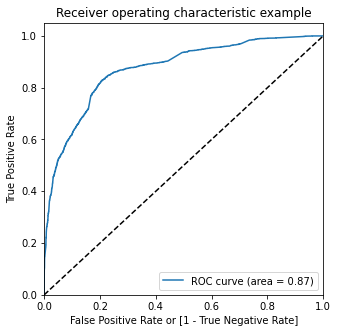

In [117]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.87 which is a very good value.___</font>

In [118]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0


In [119]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.556290,0.970155,0.297055
0.2,0.2,0.747126,0.882666,0.662228
0.3,0.3,0.799402,0.848324,0.768758
0.4,0.4,0.807117,0.790270,0.817670
0.5,0.5,0.794206,0.659444,0.878617
0.6,0.6,0.790427,0.576860,0.924200
0.7,0.7,0.781294,0.506132,0.953649
0.8,0.8,0.756731,0.412919,0.972087
0.9,0.9,0.711541,0.267784,0.989501


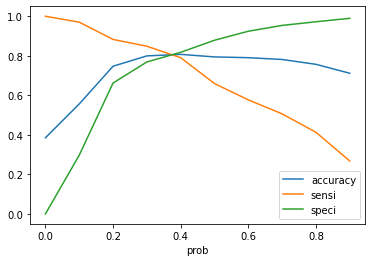

In [120]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is near to 0.35

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0,1


In [122]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8071169894504803

In [123]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3113,  792],
       [ 433, 2013]], dtype=int64)

In [124]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [125]:
# Calculating the sensitivity
TP/(TP+FN)

0.8229762878168438

In [126]:
# Calculating the specificity
TN/(TN+FP)

0.7971830985915493

With the current cut off as 0.35, we have accuracy 80.7%, sensitivity 82.3%, specificity of around 80%.

## 8. Prediction on Test set

In [127]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [128]:
# Substituting all the columns in the final train model
col = X_train.columns

In [129]:
# Selecting the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,1.0,0.070530,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.679695,0,1,0,0,0,0,1,0,1,0,0,0
7936,1.0,0.033243,0,0,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,0,0,1,0,0
3830,1.0,0.073675,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,0,0,0,0,0,0,0,0,0,1,0,0
2879,1.0,0.264600,0,0,0,0,0,0,0,0,0,1,0,0
6501,1.0,0.599730,0,1,0,0,0,0,0,0,0,0,0,0
7155,1.0,0.231357,0,1,0,0,0,0,0,0,0,1,0,0


In [130]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.200862
1,1,0.958381
2,0,0.178416
3,1,0.777172
4,0,0.202849


In [131]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.200862,0
1,1,0.958381,1
2,0,0.178416,0
3,1,0.777172,1
4,0,0.202849,0
...,...,...,...
2718,0,0.321289,0
2719,0,0.236746,0
2720,1,0.823642,1
2721,0,0.137902,0


In [132]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7987513771575468

In [133]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1377,  357],
       [ 191,  798]], dtype=int64)

In [134]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [135]:
# Calculating the sensitivity
TP/(TP+FN)

0.8068756319514662

In [136]:
# Calculating the specificity
TN/(TN+FP)

0.7941176470588235

With the cut off as 0.35 we have accuracy as 79.8%, sensitivity as 80.6% and specificity of around 79%

## 9. Precision-Recall

In [137]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3431,  474],
       [ 833, 1613]], dtype=int64)

In [138]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7728797316722569

In [139]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6594439901880621

With the cut off as 0.35 we have Precision of 77.28% and Recall of 65.9%

### 9.1. Precision and recall tradeoff

In [140]:
from sklearn.metrics import precision_recall_curve

In [142]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

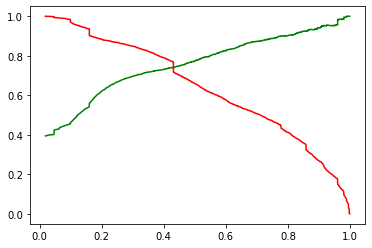

In [143]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

from above graph , we can see the precision and recall intersect at 0.42

In [144]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0,1


In [145]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8080617225633758

In [146]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3235,  670],
       [ 549, 1897]], dtype=int64)

In [147]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [148]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7389949357226334

In [149]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7755519215044971

For current cut off as 0.42, we have Precision around 74% and Recall around 77%

## 10. Prediction on Test set

In [150]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.200862
1,1,0.958381
2,0,0.178416
3,1,0.777172
4,0,0.202849


In [152]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.200862,0
1,1,0.958381,1
2,0,0.178416,0
3,1,0.777172,1
4,0,0.202849,0
...,...,...,...
2718,0,0.321289,0
2719,0,0.236746,0
2720,1,0.823642,1
2721,0,0.137902,0


In [153]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8020565552699229

In [154]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1433,  301],
       [ 238,  751]], dtype=int64)

In [155]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [156]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7138783269961977

In [157]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7593528816986855

For the current cut off as 0.42, we have Precision around 72% and Recall around 76%

## Conclusion
From the above analysis, important variables:
1.	Total time spend on the Website.
2.	Lead Origin_lead add form
3.	When the lead source_welingak website
4.	Last activity_had a phone conversation
5.	What is your current occupation_working professional

By Keeping these in mind, X Education can improve their lead conversion rate from current 30% and can achieve better conversion rates.